# Local modeling: nearest neighbors and trees


# Global vs local modeling

### So far we have learned two predictive modeling techniques: OLS regression and logistic regression 

### Common theme: Global, parametric models (+ probabilistic model for inference) --- lots of assumptions!

### A different approach: *Local* modeling: I am similar to my neighbors

### Simple example: 1-nearest neighbor:

1. Define a distance over the $\cal X$ space. For $x\in \mathbb R^p$ can simply choose the Euclidean distance: 
$$d(x,u) = \|x-u\|^2.$$
2. For a prediction point (say $x_0 \in Te$), find its nearest neighbor in the Tr
$$ i_0 = \arg\min_i d(x_0,x_i).$$
3. Predict $x_0$ as the response at the nearest neighbor $\hat{y}_0 = y_{i_0}.$

# K-nearest neighbor (KNN) methods

### Repeat the same steps, but instead of finding the nearest neighbor only, find the $k$ nearest points in $Tr$ to $x_0$. Assume their indexes are $i_{01},...,i_{0k}.$


### For regression predict the average: 
$$\hat{y}_0 = \frac{1}{k} \sum_{j=1}^k y_{i_{0j}}.$$

### For classification predict the majority: 
$$\hat{y}_0 = \left\{ \begin{array}{ll} 1 & \mbox{if} \frac{1}{k} \sum_{j=1}^k y_{i_{0j}} > 1/2  \\
0 & \mbox{otherwise}\end{array} \right.$$


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import math
import random

%matplotlib inline

In [8]:

saheart = pd.read_table("http://statweb.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data", header = 0,sep=',',index_col=0)
saheart.head()

saheart_X=pd.get_dummies(saheart.iloc[:,:9]).iloc[:,:9]
saheart_y=saheart.iloc[:,9]
n = saheart_X.shape[0]
tr_size = math.floor(0.8*n)
te_size = n-tr_size
tr_ind = random.sample(range(n),tr_size)
SA_Xtr = saheart_X.iloc[tr_ind,:]
SA_Xte = saheart_X.drop(saheart_X.index[tr_ind])
SA_Ytr = saheart_y.iloc[tr_ind]
SA_Yte = saheart_y.drop(saheart_y.index[tr_ind])


In [16]:
import sklearn.neighbors as skn

ntr = SA_Xtr.shape[0]
nte = SA_Xte.shape[0]
tr_err = []
te_err = []
kvals = [1,3,5,10,50,100,200]
for k in kvals:
    knn = skn.KNeighborsClassifier(n_neighbors=k)
    knn.fit (SA_Xtr,SA_Ytr)
    yhat_tr = knn.predict(SA_Xtr)>0.5
    yhat = knn.predict(SA_Xte)>0.5
    tr_err.append(np.sum(yhat_tr!=SA_Ytr)/ntr)
    te_err.append(np.sum(yhat!=SA_Yte)/nte)


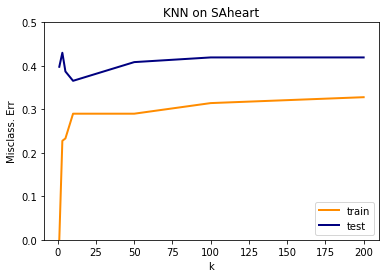

In [17]:
plt.figure()
lw = 2
plt.plot(kvals, tr_err, color='darkorange', lw=lw, label='train' )
plt.plot(kvals, te_err, color='navy', lw=lw, label='test')
plt.ylim([0.0, 0.5])
plt.xlabel('k')
plt.ylabel('Misclass. Err')
plt.title('KNN on SAheart')
plt.legend(loc="lower right")
plt.show() 

In [18]:

ratings = pd.read_table("http://www.tau.ac.il/~saharon/StatsLearn2018/train_ratings_all.dat", header = None)
ratings[ratings == 0] = None
miss_cong = pd.read_csv("http://www.tau.ac.il/~saharon/StatsLearn2018/train_y_rating.dat", header = None, names = ['score'])
movies = pd.read_csv("http://www.tau.ac.il/~saharon/StatsLearn2018/movie_titles.txt", header = None, names = ['year', 'title'])

X = ratings.values
Y = miss_cong.values[:,0]
n = X.shape[0]
tr_size = math.floor(0.8*n)
te_size = n-tr_size
tr_ind = random.sample(range(n),tr_size)
Ne_Xtr = X[tr_ind,]
Ne_Xte = np.delete(X,tr_ind,0)
Ne_Ytr = Y[tr_ind]
Ne_Yte = np.delete(Y,tr_ind)

In [19]:
tr_err = []
te_err = []
kvals = [1,3,5,10,50,100,200,500]
for k in kvals:
    knn = skn.KNeighborsRegressor(n_neighbors=k)
    knn.fit (Ne_Xtr[:,:14],Ne_Ytr)
    yhat_tr = knn.predict(Ne_Xtr[:,:14])
    yhat = knn.predict(Ne_Xte[:,:14])
    tr_err.append(math.sqrt(np.sum((yhat_tr-Ne_Ytr)**2)/tr_size))
    te_err.append(math.sqrt(np.sum((yhat-Ne_Yte)**2)/te_size))

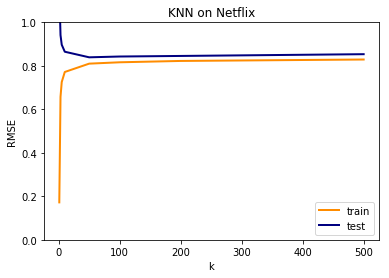

In [20]:
plt.figure()
lw = 2
plt.plot(kvals, tr_err, color='darkorange', lw=lw, label='train' )
plt.plot(kvals, te_err, color='navy', lw=lw, label='test')
plt.ylim([0, 1])
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('KNN on Netflix')
plt.legend(loc="lower right")
plt.show() 

# The problems with KNN? 

### 1. What is the appropriate distance metric?

### 2. If the data are "sparse" in the space, nearest neighbors are far and the results can be very bad

### *Curse of dimensionality*: if the dimension $p$ is high,  data are by definition sparse

### KNN fails in these settings

### Interesting solution to both problems: Adaptive local methods 


# Adaptive local methods: trees

### The idea: split the space $\cal X$ into *neighborhoods* by recursive partioning

### Each time: pick a region and split it into two (or more) regions

### Can be described using a tree --- binary tree if all splits are in two

![Alt text](images/CART_tree_titanic_survivors.png)

# Classification tree on South African Heart data 

In [22]:
SA_Xtr.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,famhist_Absent
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000
mean,137.813008,3.486802,4.724851,25.490976,53.208672,26.194553,16.683902,42.428184,0.615176
std,19.707653,4.618475,2.059389,7.698957,10.017774,4.281510,23.528856,14.732243,0.487214
min,102.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.000000,3.300000,20.310000,47.000000,23.090000,0.190000,31.000000,0.000000
50%,134.000000,1.620000,4.300000,26.260000,53.000000,25.990000,7.610000,44.000000,1.000000
75%,148.000000,5.150000,5.800000,30.960000,60.000000,28.630000,23.970000,55.000000,1.000000
max,216.000000,31.200000,15.330000,42.490000,78.000000,46.580000,144.000000,64.000000,1.000000


[Text(167.4, 181.2, 'X[7] <= 50.5\nentropy = 0.441\nsamples = 369\nvalue = [248, 121]'),
 Text(83.7, 108.72, 'X[4] <= 68.5\nentropy = 0.323\nsamples = 237\nvalue = [189, 48]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.285\nsamples = 221\nvalue = [183, 38]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.469\nsamples = 16\nvalue = [6, 10]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 1.175\nentropy = 0.494\nsamples = 132\nvalue = [59, 73]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.394\nsamples = 37\nvalue = [27, 10]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.447\nsamples = 95\nvalue = [32, 63]')]

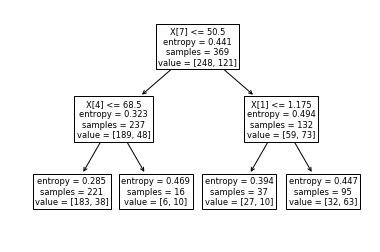

In [23]:
SAtree = tree.DecisionTreeClassifier(max_depth=2)
SAtree_2 = SAtree.fit(SA_Xtr, SA_Ytr)
tree.plot_tree(SAtree_2) 

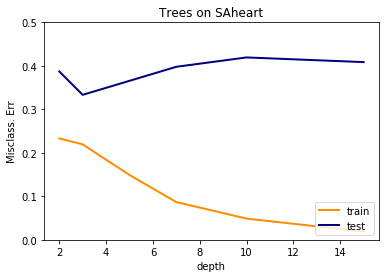

In [24]:
ntr = SA_Xtr.shape[0]
nte = SA_Xte.shape[0]
tr_err = []
te_err = []
ds = [2,3,5,7,10,15]
for depth in ds:
    SAtree = tree.DecisionTreeClassifier(max_depth=depth)
    SAtree = SAtree.fit(SA_Xtr, SA_Ytr)
    yhat_tr = SAtree.predict(SA_Xtr)>0.5
    yhat = SAtree.predict(SA_Xte)>0.5
    tr_err.append(np.sum(yhat_tr!=SA_Ytr)/ntr)
    te_err.append(np.sum(yhat!=SA_Yte)/nte)

plt.figure()
lw = 2
plt.plot(ds, tr_err, color='darkorange', lw=lw, label='train' )
plt.plot(ds, te_err, color='navy', lw=lw, label='test')
plt.ylim([0.0, 0.5])
plt.xlabel('depth')
plt.ylabel('Misclass. Err')
plt.title('Trees on SAheart')
plt.legend(loc="lower right")
plt.show() 

# Tree on Netflix data (14 variables)

[Text(167.4, 181.2, 'X[9] <= 3.5\nentropy = 0.9\nsamples = 8000\nvalue = 3.619'),
 Text(83.7, 108.72, 'X[4] <= 4.5\nentropy = 0.845\nsamples = 3332\nvalue = 3.242'),
 Text(41.85, 36.23999999999998, 'entropy = 0.777\nsamples = 2612\nvalue = 3.137'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.907\nsamples = 720\nvalue = 3.622'),
 Text(251.10000000000002, 108.72, 'X[13] <= 4.5\nentropy = 0.765\nsamples = 4668\nvalue = 3.888'),
 Text(209.25, 36.23999999999998, 'entropy = 0.732\nsamples = 3351\nvalue = 3.74'),
 Text(292.95, 36.23999999999998, 'entropy = 0.65\nsamples = 1317\nvalue = 4.267')]

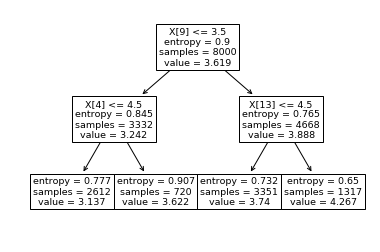

In [25]:
Netree = tree.DecisionTreeRegressor(max_depth=2)
Netree_2 = Netree.fit(Ne_Xtr[:,:14], Ne_Ytr)
tree.plot_tree(Netree_2) 

In [62]:
ntr = Ne_Xtr.shape[0]
nte = Ne_Xte.shape[0]
tr_err = []
te_err = []
ds = [2,3,5,7,10,15]
for depth in ds:
    Netree = tree.DecisionTreeRegressor(max_depth=depth)
    Netree = Netree.fit(Ne_Xtr[:,:14], Ne_Ytr)
    yhat_tr = Netree.predict(Ne_Xtr[:,:14])
    yhat = Netree.predict(Ne_Xte[:,:14])
    tr_err.append(math.sqrt(np.sum((yhat_tr-Ne_Ytr)**2)/ntr))
    te_err.append(math.sqrt(np.sum((yhat-Ne_Yte)**2)/nte))

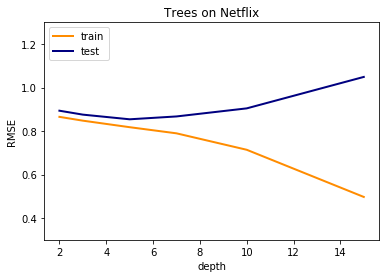

[0.8937145920123148,
 0.8756548882924237,
 0.8542034221709449,
 0.8673201256664707,
 0.904433367205779,
 1.049056392403637]

In [64]:
plt.figure()
lw = 2
plt.plot(ds, tr_err, color='darkorange', lw=lw, label='train' )
plt.plot(ds, te_err, color='navy', lw=lw, label='test')
plt.ylim([0.3,1.3])
plt.xlabel('depth')
plt.ylabel('RMSE')
plt.title('Trees on Netflix')
plt.legend(loc="upper left")
plt.show() 
te_err

# Defining a decision tree algorithm

### There are three main aspects to designing a decision tree algorithm for classification or regression:

1. How do we choose a split at each node of the tree?
2. How do we decide when to stop splitting?
3. How do we fit a value $\hat{y}$ for each terminal node (*leaf*)?

### Some well known decision tree algorithms: 

#### ID3, C4.5, C5.0: for classification only, invented in the CS/machine learning community

#### Classification and regression trees (CART): invented in the statistics community

### We are going to mostly describe CART, which is the basis for modern methods we discuss later

# CART for regression: splitting process

### Criterion: Minimize RSS on training. 

### Given set of $r$ observation in current node, define for a variable $j$ and possible split point $s$: 
$$ L(j,s) = \{i\leq r: x_{ij} \leq s\}\;,\;\; R(j,s) = \{i\leq r: x_{ij} > s\}$$
$$ \bar{y}_L =\frac{\sum_{i \in L(j,s)} y_i}{|L(j,s)|}\;,\; \bar{y}_R=\frac{\sum_{i \in R(j,s)} y_i}{|R(j,s)|}$$
$$ RSS(j,s) = \sum_{i \in L(j,s)} (y_i - \bar{y}_L)^2 + \sum_{i \in R(j,s)} (y_i - \bar{y}_R)^2$$

### And find the pair $j,s$ which minimize this RSS among all possible pairs --- this is the split we do

### Split the node into two according to the chosen split and continue


# CART for regression: fits at leaves

### Similar to OLS, we think we want to estimate $\hat{y}(x) \approx E(y|x)$ 

### We interpret the splitting as finding *homogeneous areas* with similar $y$ values in our data, hence hopefully similar $E(y|x).$

### Consequently, given a leaf (terminal node) with set of observations $Q \in \{1,...,n\}$, we estimate: 

$$ \hat{y} = \bar{y}_Q = \frac{\sum_{i \in Q} y_i}{|Q|}$$

# CART for regression: stopping criteria

### Why limit tree size? Overfitting, computation,...

### In the examples above: *max_depth* of tree

### Other options: size of nodes not too small, improvement in RSS not too small,...

### Interesting approach of CART: grow a very big tree and *prune* it to smaller tree using test set performance (actually cross-validation, which we have not discussed)

# CART and others for classification

### various splitting criteria: Gini, information gain, log-likelihood, all give similar trees

### Not a good idea: using misclassification rate as splitting criterion

### Fits at leaves: usually empirical % of classes (or majority if need hard classification)

### Stopping criteria: similar ideas to regression


## Important properties of trees for real-life data: 1. categoraical features

### Real life data often includes categorical features that have many values but are important for prediction, like: 
1. City of residence
2. University/department
3. Customer class

### CART always does binary splits. For a categorical variable with $K$ values $\cal G = \{g_1,...,g_K\}$  it divides $\cal G$ into two groups $\cal G_1, \cal G_2$ so that:
$$L(j) = \{i : x_{ij} \in \cal G_1\}\;,\;\;R(j) = \{i : x_{ij} \in \cal G_1\}.$$

### C4.5/C5.0 do multi-way non-binary splits

### Presents intersting computational and statistical challenges


## Important properties of trees for real-life data: 2. missing data

### Many methods struggle dealing with missing data, trees have nice solutions

### Solution 1 (C4.5): if I want to split on feature $j$ and I don't know $x_{ij}$, send observation $i$ both left and right

### Solution 2 (CART): in addition to the split I want to do, find similar *surrogate splits* on other variables, and if I don't see $x_{ij}$ I can use surrogate split on $x_{ik}$

# Summary: trees

### Advantages: 
1. Intuitive and appealing: divide the space into *flexible* neighborhoods
2. Flexible: categorical variables, missing data, regression or classification, big or small,...
3. Big trees are a very rich class of models: can describe well many true models for $E(y|x)$

### Disadvantages: 
1. Intuitive appeal is misleading: very unstable and high variance 
2. Not a good prediction model: a single tree is usually not competitive!

### Conclusions and next steps: 
1. We do not really want to use trees as our prediction models
2. Can we take advantage of their good properties and mitigate the problems? 

# Ensemble methods: using trees as subroutines

### Instead of a single tree being a model, combine many trees into a model: 
1. Bagging and Random Forest: Fit different trees to the data and average them
2. Boosting: Adaptively build a model from adding more and more trees

### We will focus now on Random Forest (also Bagging), later discuss boosting

### Main idea of Random Forest: Take advantage of the instability and high variance of the trees

### Trees are unstable and greedy: if we change the data a little bit, the tree can change a lot

### Now we intentionally change (randomize) the data to get a different tree every time, and average them


# Reminder: the value of averaging

### This is captured through different things we learned: CLT, LLN, variance of the average...

### Assume $z_i \sim F$ has some distribution with mean $\mu$ and variance $\sigma^2$. If $z_1,...,z_m \sim F$ are independent, then $ Var(\bar{z}) = \sigma^2 / m,$  so $\bar{z}$ is close to $\mu$ for large $m$ 

### Slightly more complex setting: assume $z_1,...,z_m$ are *somewhat* dependent $Cov(z_i,z_j) = \rho \sigma^2,\;\rho<1$

### Now we still get some variance reduction from averaging: 
$$Var(\bar{z}) \approx \rho\sigma^2 + (1-\rho)\sigma^2/ m$$

### This is exactly the intuition behind Random Forest: 

# Random forest algorithm

### Repeat many times: 
1. Randomize the data (by taking a subsample or a **bootstrap** sample)
2. Build a tree on the randomized data, also randomize tree building (e.g. by randomly choosing variables to consider at each node)

### To predict at new $x_0$, apply each tree and average their predictions

### Bagging applies only step 1 above (randomize data) and not step 2 (randomize the splitting decisions)

### Intuition: trees are different because of randomization, they are like $z_1,...z_n \sim P(y|x_0)$
1. Related ($\rho >0$) because it's the same training set $T$
2. Still different from each other ($\rho<1$ because of randomization and instability of trees

### Hence we expect (and indeed see!) that Random Forest gives more accurate predictions of $E(y|x)$ or $P(y=1|x)$ than single trees


In [65]:
from sklearn import ensemble
ntr = Ne_Xtr.shape[0]
nte = Ne_Xte.shape[0]
tr_err = []
te_err = []
ntrees = [1,10,50,100,500,1000]
for ntree in ntrees: 
    RF = ensemble.RandomForestRegressor(n_estimators=ntree, min_samples_split=2, min_samples_leaf=1, max_features=0.33,  bootstrap=True)
    RF = RF.fit(Ne_Xtr[:,:14], Ne_Ytr)
    yhat_tr = RF.predict(Ne_Xtr[:,:14])
    yhat = RF.predict(Ne_Xte[:,:14])
    tr_err.append(math.sqrt(np.sum((yhat_tr-Ne_Ytr)**2)/ntr))
    te_err.append(math.sqrt(np.sum((yhat-Ne_Yte)**2)/nte))

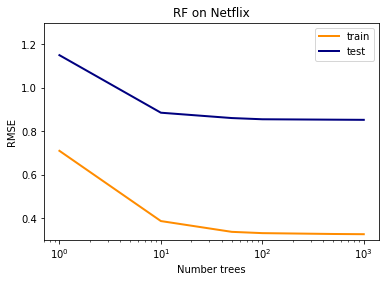

[1.1500505115047537,
 0.8854106626312601,
 0.8608213050990714,
 0.8552565641811191,
 0.8533703566542181,
 0.8526231195012078]

In [66]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xscale('log')
lw = 2
plt.plot(ntrees, tr_err, color='darkorange', lw=lw, label='train' )
plt.plot(ntrees, te_err, color='navy', lw=lw, label='test')
plt.ylim([0.3,1.3])
plt.xlabel('Number trees')
plt.ylabel('RMSE')
plt.title('RF on Netflix')
plt.legend(loc="upper right")
plt.show() 

te_err

# Let's try it bravely on the full 99 dimensions!

In [ ]:
Ne_Xtr_noNAN = Ne_Xtr
Ne_Xtr_noNAN[np.isnan(Ne_Xtr_noNAN)]=0
Ne_Xte_noNAN = Ne_Xte
Ne_Xte_noNAN[np.isnan(Ne_Xte_noNAN)]=0

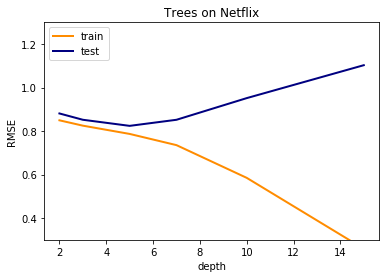

[0.8810564156751207,
 0.8520412825903552,
 0.8240262269870388,
 0.8519709291892043,
 0.9515991049566812,
 1.1029870673381963]

In [60]:
# Regular trees: 
tr_err = []
te_err = []
ds = [2,3,5,7,10,15]
for depth in ds:
    Netree = tree.DecisionTreeRegressor(max_depth=depth)
    Netree = Netree.fit(Ne_Xtr_noNAN, Ne_Ytr)
    yhat_tr = Netree.predict(Ne_Xtr_noNAN)
    yhat = Netree.predict(Ne_Xte_noNAN)
    tr_err.append(math.sqrt(np.sum((yhat_tr-Ne_Ytr)**2)/ntr))
    te_err.append(math.sqrt(np.sum((yhat-Ne_Yte)**2)/nte))


plt.figure()
lw = 2
plt.plot(ds, tr_err, color='darkorange', lw=lw, label='train' )
plt.plot(ds, te_err, color='navy', lw=lw, label='test')
plt.ylim([0.3,1.3])
plt.xlabel('depth')
plt.ylabel('RMSE')
plt.title('Trees on Netflix')
plt.legend(loc="upper left")
plt.show() 

te_err


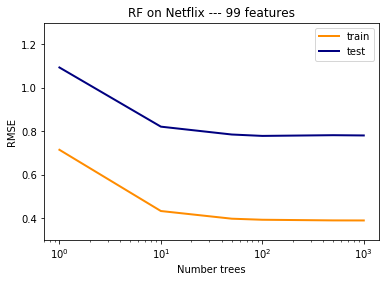

[1.093460557760979,
 0.8212518406891537,
 0.7851454341973727,
 0.7787280658352046,
 0.7820367521434105,
 0.7807919984867411]

In [61]:
# RF: 
tr_err = []
te_err = []
ntrees = [1,10,50,100,500,1000]
for ntree in ntrees: 
    RF = ensemble.RandomForestRegressor(n_estimators=ntree, min_samples_split=5, min_samples_leaf=2, max_features=10,  bootstrap=True)
    RF = RF.fit(Ne_Xtr_noNAN, Ne_Ytr)
    yhat_tr = RF.predict(Ne_Xtr_noNAN)
    yhat = RF.predict(Ne_Xte_noNAN)
    tr_err.append(math.sqrt(np.sum((yhat_tr-Ne_Ytr)**2)/ntr))
    te_err.append(math.sqrt(np.sum((yhat-Ne_Yte)**2)/nte))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xscale('log')
lw = 2
plt.plot(ntrees, tr_err, color='darkorange', lw=lw, label='train' )
plt.plot(ntrees, te_err, color='navy', lw=lw, label='test')
plt.ylim([0.3,1.3])
plt.xlabel('Number trees')
plt.ylabel('RMSE')
plt.title('RF on Netflix --- 99 features')
plt.legend(loc="upper right")
plt.show() 

te_err